In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
np.random.seed(42)

from matplotlib import style
style.use('fivethirtyeight')

In [ ]:
data_dir = '.'
train_path = './flower_photos_by_number'
test_path = './test/'

IMG_HEIGHT = 224
IMG_WIDTH = 224
channels = 3

In [4]:
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

5

In [ ]:
classes = { 0:'daisy',
            1:'dandelion', 
            2:'roses', 
            3:'sunflowers', 
            4:'tulips', 
            }

In [6]:
class_list = list(classes.keys())
class_list

[0, 1, 2, 3, 4]

In [ ]:
image_data = []
image_labels = []


image_data = []
image_labels = []

for i in range(len(class_list)):
    path =  f'{train_path}/{i}'
    if i not in class_list:
        continue
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error in " + img)

image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)

(3670, 224, 224, 3) (3670,)


In [13]:
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

In [14]:
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.2, random_state=42, shuffle=True)

X_train = X_train/255 
X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (2936, 224, 224, 3)
X_valid.shape (734, 224, 224, 3)
y_train.shape (2936,)
y_valid.shape (734,)


In [15]:
y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)
y_val = keras.utils.to_categorical(y_val, NUM_CATEGORIES)

print(y_train.shape)
print(y_val.shape)

(2936, 5)
(734, 5)


In [16]:
model = keras.models.Sequential([    
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,channels)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),
    
    keras.layers.Dense(NUM_CATEGORIES, activation='softmax')
])

c:\Users\YungSir\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [ ]:
lr = 0.001
opt = Adam(learning_rate=lr)  
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

aug = ImageDataGenerator(
    rotation_range=15,            
    zoom_range=0.2,               
    width_shift_range=0.15,       
    height_shift_range=0.15,      
    shear_range=0.2,            
    horizontal_flip=True,         
    vertical_flip=True,           
    fill_mode="reflect"           
)

epochs = 300

history = model.fit(aug.flow(X_train,y_train, batch_size=32), epochs=epochs, validation_data=(X_val,y_val))

Epoch 1/300
92/92 ━━━━━━━━━━━━━━━━━━━━ 69s 739ms/step - accuracy: 0.5107 - loss: 1.3827 - val_accuracy: 0.2752 - val_loss: 2.6670
Epoch 2/300
92/92 ━━━━━━━━━━━━━━━━━━━━ 71s 768ms/step - accuracy: 0.5817 - loss: 1.1893 - val_accuracy: 0.2875 - val_loss: 2.2700
Epoch 3/300
92/92 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.6152 - loss: 1.0658 - val_accuracy: 0.3842 - val_loss: 1.6914
Epoch 4/300
92/92 ━━━━━━━━━━━━━━━━━━━━ 95s 1s/step - accuracy: 0.6289 - loss: 1.0184 - val_accuracy: 0.5613 - val_loss: 1.1050
Epoch 5/300
92/92 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - accuracy: 0.6347 - loss: 0.9846 - val_accuracy: 0.5845 - val_loss: 1.1334
Epoch 6/300
92/92 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - accuracy: 0.6635 - loss: 0.9185 - val_accuracy: 0.6308 - val_loss: 0.9125
Epoch 7/300
92/92 ━━━━━━━━━━━━━━━━━━━━ 93s 989ms/step - accuracy: 0.6829 - loss: 0.8844 - val_accuracy: 0.5872 - val_loss: 1.0546
Epoch 8/300
92/92 ━━━━━━━━━━━━━━━━━━━━ 89s 947ms/step - accuracy: 0.6664 - loss: 0.8875 - val_accuracy

In [21]:
model.save("cnnmodel.h5")

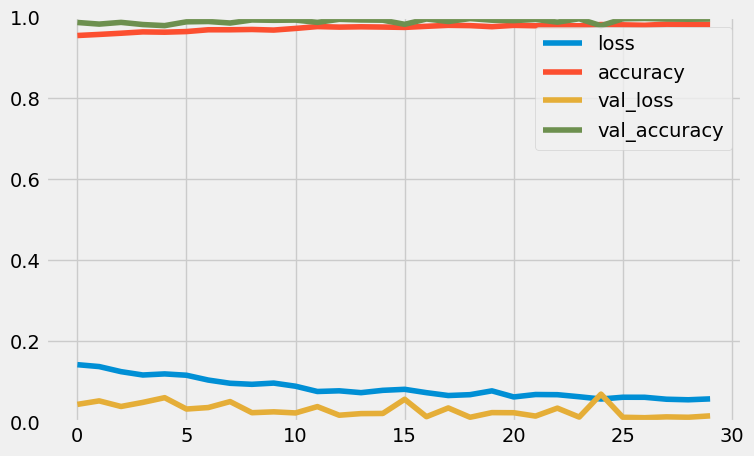

In [49]:
# pd.DataFrame(history.history).plot(figsize=(8, 5))
# plt.grid(True)
# plt.gca().set_ylim(0, 1)
# plt.show()

In [ ]:
imgs = []  
labels = []

for filename in os.listdir(test_path):

    if 'jpg' in filename:
        #print(filename[0])
        if int(filename[0]) not in class_list:
            continue
        imgs.append(filename) 
        labels.append(int(filename[0]))



#labels_encoded = tf.keras.utils.to_categorical(labels)

data =[]


for img in imgs:
    try:
        image = cv2.imread(f'{test_path}/{img}')
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)
X_test = X_test/255


pred = model.predict(X_test)

one_hot_pred = np.array(pred)

class_indices = np.argmax(one_hot_pred, axis=1)

predd = class_indices.tolist()

print('Test Data accuracy: ',accuracy_score(labels, predd)*100, '%')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Test Data accuracy:  100.0 %


In [51]:
# # print(labels)
# # print(predd)

# Mark = 0
# TotalMark = len(labels)

# for true_label, predicted_label in zip(labels, predd):
#     if true_label == predicted_label:
#         Mark += 1

# accuracy_percentage = (Mark / TotalMark) * 100
# print('Accuracy %:', accuracy_percentage, '%')

Accuracy %: 97.9436152570481 %


In [29]:
classes

{0: 'daisy', 1: 'dandelion', 2: 'roses', 3: 'sunflowers', 4: 'tulips'}

In [34]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

print(classification_report(labels, predd))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [28]:
print('accuracy_score:', accuracy_score(labels, predd))
print('precision_score:', precision_score(labels, predd, average='macro'))
print('recall_score:', recall_score(labels, predd, average='macro'))
print('f1_score:', f1_score(labels, predd, average='macro'))

accuracy_score: 1.0
precision_score: 1.0
recall_score: 1.0
f1_score: 1.0


In [37]:
predDetailPercentageDict = {}
predDetailPercentageList = []
for i in range(len(X_test)):
    probabilities = pred[i] * 100
    predicted_class = np.argmax(pred[i])
    class_probabilities = {classes[j]: f"{probabilities[j]:.2f}%" for j in range(len(classes))}
    photo_prediction = f"{imgs[i]}"
    predDetailPercentageDict[photo_prediction] = class_probabilities
    predDetailPercentageList.append(class_probabilities)

print(predDetailPercentageDict)
print(predDetailPercentageList)

{'0_7.jpg': {'daisy': '99.96%', 'dandelion': '0.00%', 'roses': '0.00%', 'sunflowers': '0.00%', 'tulips': '0.04%'}, '2_9.jpg': {'daisy': '0.00%', 'dandelion': '0.01%', 'roses': '99.88%', 'sunflowers': '0.09%', 'tulips': '0.02%'}, '3_7.jpg': {'daisy': '0.00%', 'dandelion': '0.01%', 'roses': '0.00%', 'sunflowers': '99.96%', 'tulips': '0.04%'}}
[{'daisy': '99.96%', 'dandelion': '0.00%', 'roses': '0.00%', 'sunflowers': '0.00%', 'tulips': '0.04%'}, {'daisy': '0.00%', 'dandelion': '0.01%', 'roses': '99.88%', 'sunflowers': '0.09%', 'tulips': '0.02%'}, {'daisy': '0.00%', 'dandelion': '0.01%', 'roses': '0.00%', 'sunflowers': '99.96%', 'tulips': '0.04%'}]


IndexError: list index out of range

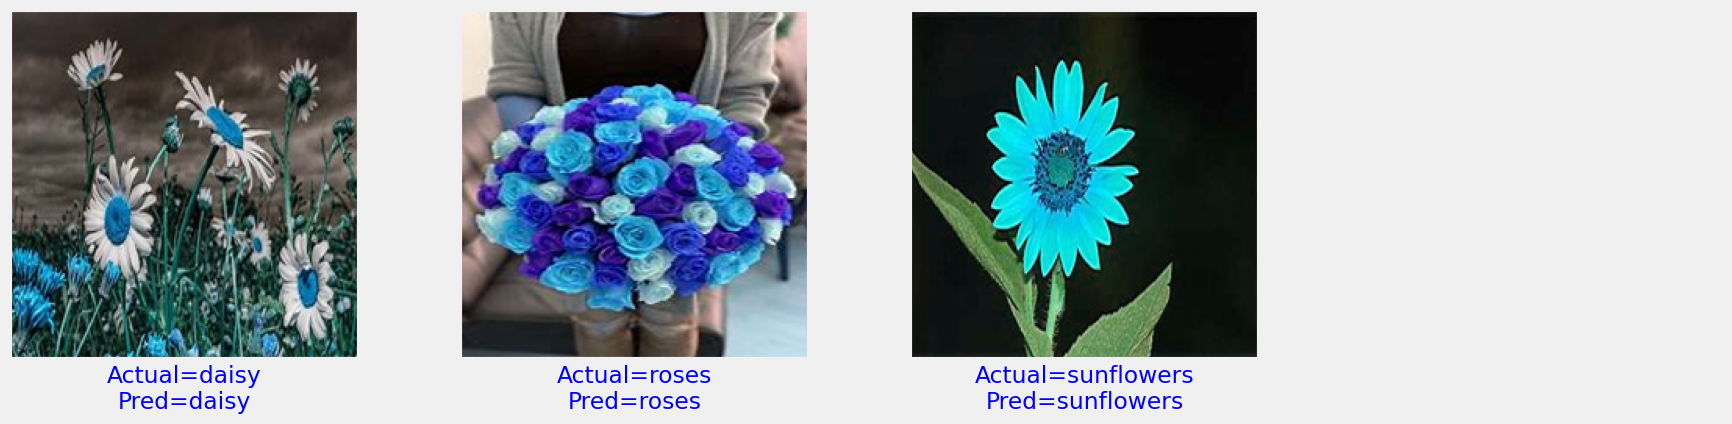

In [38]:
plt.figure(figsize = (25, 25))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = classes[ predd[start_index + i] ]
    actual = classes[ labels[start_index + i] ]

    if not np.all(prediction == actual):
        col = 'r'
    else:
        col = 'b'

    plt.xlabel('Actual={}\nPred={}'.format(actual, prediction), color = col)
    plt.imshow(data[start_index + i])
plt.show()